<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Stacked-LSTM-model-with-normal-train-test-split" data-toc-modified-id="Stacked-LSTM-model-with-normal-train-test-split-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Stacked LSTM model with normal train test split</a></span><ul class="toc-item"><li><span><a href="#Data-manipulation-and-visualization" data-toc-modified-id="Data-manipulation-and-visualization-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data manipulation and visualization</a></span></li><li><span><a href="#LSTM-Model-building-and-training" data-toc-modified-id="LSTM-Model-building-and-training-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LSTM Model building and training</a></span></li><li><span><a href="#Getting-predictions" data-toc-modified-id="Getting-predictions-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Getting predictions</a></span></li><li><span><a href="#predicrted-VS-real-values" data-toc-modified-id="predicrted-VS-real-values-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>predicrted VS real values</a></span></li></ul></li><li><span><a href="#BiLSTM-model-with-rolling-window-in-train-test-split" data-toc-modified-id="BiLSTM-model-with-rolling-window-in-train-test-split-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>BiLSTM model with rolling window in train test split</a></span><ul class="toc-item"><li><span><a href="#Data-manipulation" data-toc-modified-id="Data-manipulation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data manipulation</a></span></li><li><span><a href="#Model-building-and-training" data-toc-modified-id="Model-building-and-training-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Model building and training</a></span></li></ul></li></ul></div>

# Description
**This program predicts the closing price of Apple stocks using a given look back value(LSTM) or a given sequence length (BiLSTM)**


In [64]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Stacked LSTM model with normal train test split

## Data manipulation and visualization

Data set shape: (2193, 6)


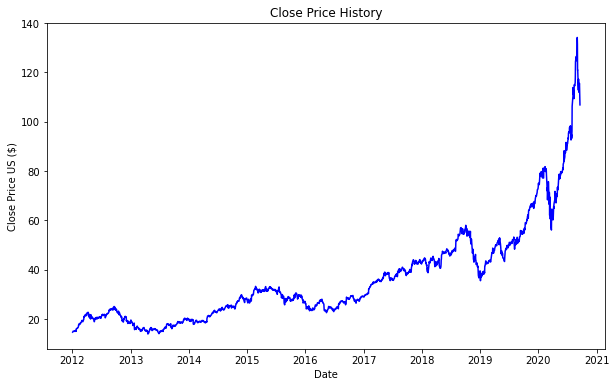

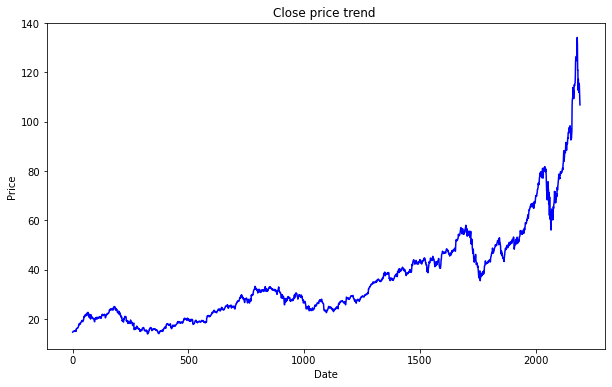

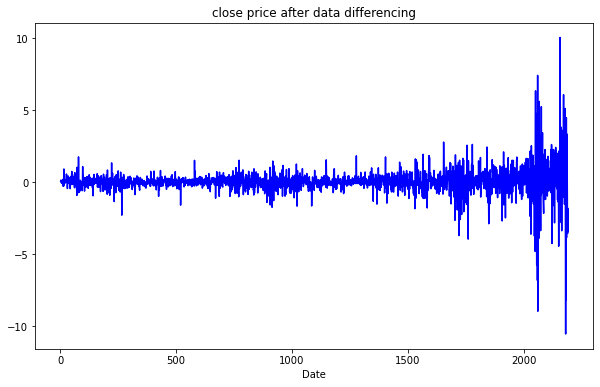

Training set shape: (1754, 1)
Testing set shape: (498, 1)


In [187]:
from utilities.data_manipulation import get_data
x_train, y_train, x_test, y_test, training_data_len, close_df = get_data()


## LSTM Model building and training

In [192]:
from utilities.get_model import get_model
from tensorflow.keras.callbacks import EarlyStopping
model = get_model(x_train)
# training the model
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights = True, verbose=10)
lstm_history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=40,shuffle=False,validation_split=0.1, callbacks=[early_stopping])

Train on 1524 samples, validate on 170 samples
Epoch 1/40
1524/1524 [==============================] - 4s 2ms/step - loss: 0.1704 - MAE: 0.2897 - val_loss: 0.7832 - val_MAE: 0.6390
Epoch 2/40
1524/1524 [==============================] - 3s 2ms/step - loss: 0.1701 - MAE: 0.2894 - val_loss: 0.7859 - val_MAE: 0.6404
Epoch 3/40
1524/1524 [==============================] - 3s 2ms/step - loss: 0.1699 - MAE: 0.2892 - val_loss: 0.7868 - val_MAE: 0.6406
Epoch 4/40
1524/1524 [==============================] - 3s 2ms/step - loss: 0.1696 - MAE: 0.2890 - val_loss: 0.7888 - val_MAE: 0.6411
Epoch 5/40
1524/1524 [==============================] - 3s 2ms/step - loss: 0.1697 - MAE: 0.2891 - val_loss: 0.7904 - val_MAE: 0.6419
Epoch 6/40
1524/1524 [==============================] - 3s 2ms/step - loss: 0.1699 - MAE: 0.2894 - val_loss: 0.7899 - val_MAE: 0.6416
Epoch 7/40
1524/1524 [==============================] - 3s 2ms/step - loss: 0.1700 - MAE: 0.2894 - val_loss: 0.7892 - val_MAE: 0.6415
Epoch 8/40
1524

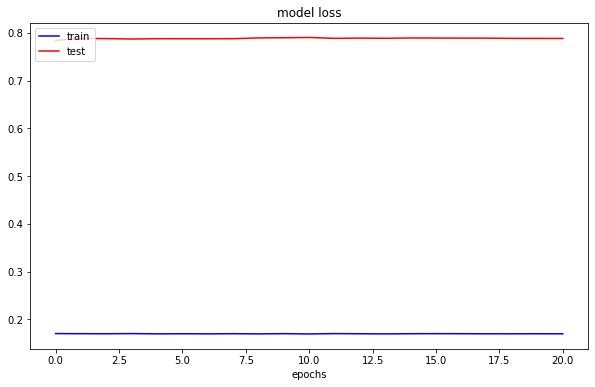

In [173]:
plotting(data1=lstm_history.history['loss'], title="model loss", x_label="epochs"
         , data2=lstm_history.history['val_loss'],legend_d1="train", legend_d2="test" )

## Getting predictions


In [184]:
from utilities.prediction import predict
validation_df = predict(model.predict(x_test), y_test, training_data_len, close_df)

MSE value: 3.2226167122746574
     predictions   real data
0      37.739285   36.707500
1      36.769948   39.292500
2      39.353652   39.037498
3      39.097269   39.057499
4      39.115534   39.435001
..           ...         ...
433   112.031480  115.360001
434   115.394032  115.540001
435   115.573559  112.129997
436   112.167438  110.339996
437   110.383915  106.839996

[438 rows x 2 columns]


##  predicrted VS real values


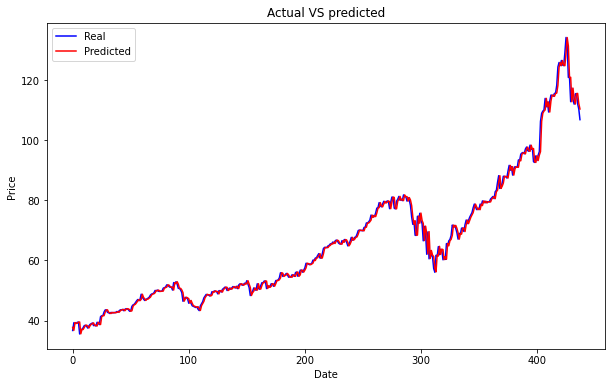

In [186]:
from utilities.visuals import plotting
plotting(validation_df["real data"], title="Actual VS predicted", y_label="Price", 
         data2=validation_df['predictions'], legend_d1="Real", legend_d2="Predicted", save_plot=True, plot_name="test.png")

# BiLSTM model with rolling window in train test split

## Data manipulation

In [94]:
from utilities.data_prep_RW import data, to_sequences, preprocess

SEQ_LEN = 50
"""Walk forward validation: 
Initial SEQ_LEN is defined above, so, walk forward will be shifting one position to the right and create another sequence.
The process is repeated until all possible positions are used."""

scaled_close = data()
x_train_bi, y_train_bi, x_test_bi, y_test_bi = preprocess(scaled_close, SEQ_LEN, train_split = 0.8)
print('x_train_bi.shape:',x_train_bi.shape, 'x_test_bi.shape:', x_test_bi.shape)

x_train_bi.shape: (1713, 49, 1) x_test_bi.shape: (429, 49, 1)


## Model building and training


In [117]:
from utilities.Bilstm_RW import get_model
from tensorflow.keras.callbacks import EarlyStopping
window_size = SEQ_LEN - 1
model = get_model(window_size, x_train_bi)
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights = True,verbose=1)
Bilstm_history= model.fit(x_train_bi, y_train_bi, epochs=50, batch_size=128 , shuffle=False,validation_split=0.1,  callbacks=[early_stopping])

Train on 1541 samples, validate on 172 samples
Epoch 1/50
1541/1541 [==============================] - 7s 5ms/step - loss: 0.1699 - MAE: 0.2896 - val_loss: 0.9173 - val_MAE: 0.6758
Epoch 2/50
1541/1541 [==============================] - 6s 4ms/step - loss: 0.1691 - MAE: 0.2886 - val_loss: 0.9263 - val_MAE: 0.6790
Epoch 3/50
1541/1541 [==============================] - 7s 4ms/step - loss: 0.1693 - MAE: 0.2890 - val_loss: 0.9308 - val_MAE: 0.6812
Epoch 4/50
1541/1541 [==============================] - 7s 5ms/step - loss: 0.1694 - MAE: 0.2890 - val_loss: 0.9324 - val_MAE: 0.6812
Epoch 5/50
1541/1541 [==============================] - 7s 5ms/step - loss: 0.1696 - MAE: 0.2893 - val_loss: 0.9294 - val_MAE: 0.6802
Epoch 6/50
1541/1541 [==============================] - 6s 4ms/step - loss: 0.1696 - MAE: 0.2894 - val_loss: 0.9281 - val_MAE: 0.6797
Epoch 7/50
1541/1541 [==============================] - 6s 4ms/step - loss: 0.1696 - MAE: 0.2896 - val_loss: 0.9296 - val_MAE: 0.6805
Epoch 8/50
1541

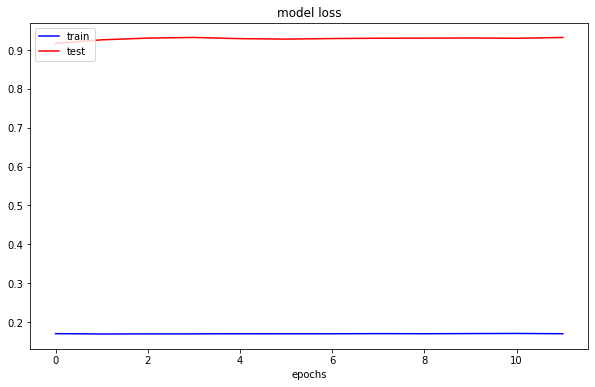

In [119]:
plotting(data1=Bilstm_history.history['loss'], title="model loss", x_label="epochs", 
         data2=Bilstm_history.history['val_loss'],legend_d1="train", legend_d2="test" )